In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [1]:
import FinanceDataReader as fdr
import pandas as pd
import json
stock2code = json.load(open('data/stock2code.json','r'))

sk = fdr.DataReader(stock2code['SK하이닉스'])[['Close']]
se = fdr.DataReader(stock2code['삼성전자'])[['Close']]
prices = pd.concat([sk, se], axis=1).loc['2020-01-01':'2020-12-31']
prices.columns =['SK','SE']
prices.head()

,SK,SE
Date,,
2020-01-02,94700,55200
2020-01-03,94500,55500
2020-01-06,94300,55500
2020-01-07,94000,55800
2020-01-08,97400,56800


## 일별수익률

$$ \frac{P_t}{P_{t-1}} - 1$$

In [2]:
# shift
prices / prices.shift(1) - 1

,SK,SE
Date,,
2020-01-02,NaN,NaN
2020-01-03,-0.002112,0.005435
2020-01-06,-0.002116,0.000000
2020-01-07,-0.003181,0.005405
2020-01-08,0.036170,0.017921
...,...,...
2020-12-23,0.031111,0.022130
2020-12-24,0.017241,0.052774
2020-12-28,-0.021186,0.011568


In [3]:
# pct_change
prices.pct_change()

,SK,SE
Date,,
2020-01-02,NaN,NaN
2020-01-03,-0.002112,0.005435
2020-01-06,-0.002116,0.000000
2020-01-07,-0.003181,0.005405
2020-01-08,0.036170,0.017921
...,...,...
2020-12-23,0.031111,0.022130
2020-12-24,0.017241,0.052774
2020-12-28,-0.021186,0.011568


In [6]:
# log_return
returns = np.log(prices) - np.log(prices.shift(1))
returns

,SK,SE
Date,,
2020-01-02,NaN,NaN
2020-01-03,-0.002114,0.005420
2020-01-06,-0.002119,0.000000
2020-01-07,-0.003186,0.005391
2020-01-08,0.035531,0.017762
...,...,...
2020-12-23,0.030637,0.021889
2020-12-24,0.017094,0.051429
2020-12-28,-0.021414,0.011502


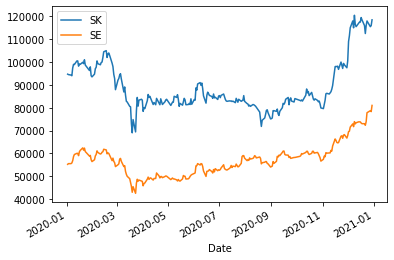

In [9]:
prices.plot()
plt.show()

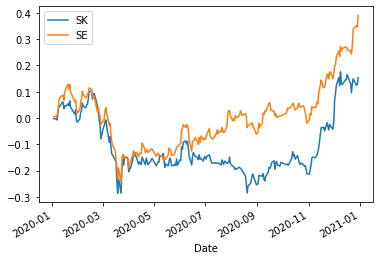

In [10]:
#누적수익률
cumrt = (returns + 1).cumprod() -1
cumrt.plot()
plt.show()

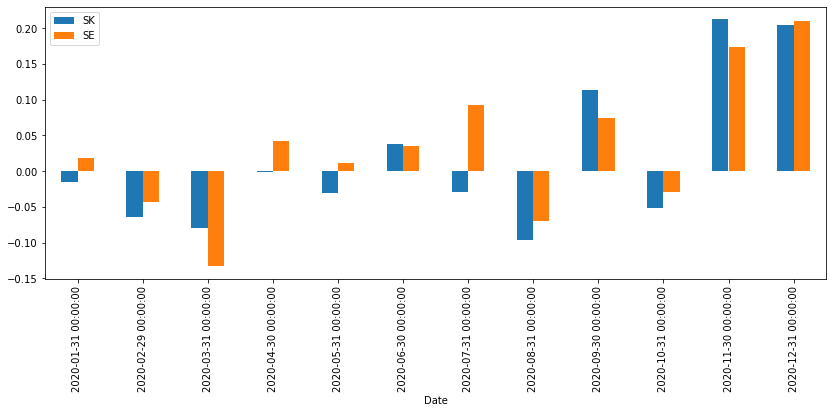

In [11]:
# 월별수익률
def cumproduct(x):
    return (x+1).prod() -1 

returns.resample('M').apply(cumproduct).plot(kind='bar', figsize=(14,5))
plt.show()

### 연율화

In [12]:
rm =0.01
(1+rm) ** 12 - 1

0.12682503013196977

In [13]:
rq = 0.03
(1+rq)**4 - 1

0.12550881000000014

In [14]:
rd = 0.0001
(1+rd)**252 -1

0.025518911987694626

In [15]:
returns = returns.dropna()
returns

,SK,SE
Date,,
2020-01-03,-0.002114,0.005420
2020-01-06,-0.002119,0.000000
2020-01-07,-0.003186,0.005391
2020-01-08,0.035531,0.017762
2020-01-09,0.016294,0.031198
...,...,...
2020-12-23,0.030637,0.021889
2020-12-24,0.017094,0.051429
2020-12-28,-0.021414,0.011502


In [16]:
# 일별 변동성
returns.std()

SK    0.025847
SE    0.020908
dtype: float64

In [17]:
# 변동성 연율화
annualized_vol = returns.std() * np.sqrt(252)
annualized_vol

SK    0.410306
SE    0.331902
dtype: float64

In [18]:
# 기하평균
def geo_mean(x):
    return ((1+x).prod()) ** (1/len(x)) - 1

rt_per_day = returns.apply(geo_mean)
annualized_rt = (rt_per_day + 1) ** 252 -1
annualized_rt

SK    0.156512
SE    0.399953
dtype: float64

In [19]:
# 샤프비율
rf_rate = 0.03
excess_rt = annualized_rt - rf_rate
sharpe = excess_rt / annualized_vol
sharpe

SK    0.308336
SE    1.114647
dtype: float64